# 1. Input data

In [109]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('D:/Tho/Tho/Project - Python'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:/Tho/Tho/Project - Python\sleepdata.csv


In [110]:
df = pd.read_csv('D:/Tho/Tho/Project - Python/sleepdata.csv',delimiter=";")
df

,Start,End,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps)
0,2014-12-29 22:57:49,2014-12-30 07:30:13,100%,8:32,:),NaN,59.0,0
1,2014-12-30 21:17:50,2014-12-30 21:33:54,3%,0:16,:|,Stressful day,72.0,0
2,2014-12-30 22:42:49,2014-12-31 07:13:31,98%,8:30,:|,NaN,57.0,0
3,2014-12-31 22:31:01,2015-01-01 06:03:01,65%,7:32,NaN,NaN,NaN,0
4,2015-01-01 22:12:10,2015-01-02 04:56:35,72%,6:44,:),Drank coffee:Drank tea,68.0,0
...,...,...,...,...,...,...,...,...
882,2018-02-12 21:54:14,2018-02-13 07:02:15,91%,9:08,NaN,NaN,NaN,56
883,2018-02-13 23:49:19,2018-02-14 07:00:53,81%,7:11,NaN,NaN,NaN,64
884,2018-02-14 21:24:05,2018-02-15 06:20:52,71%,8:56,NaN,NaN,NaN,3316
885,2018-02-15 21:36:32,2018-02-16 06:50:31,80%,9:13,NaN,NaN,NaN,6555


# 2. Pre-processing data

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Start             887 non-null    object 
 1   End               887 non-null    object 
 2   Sleep quality     887 non-null    object 
 3   Time in bed       887 non-null    object 
 4   Wake up           246 non-null    object 
 5   Sleep Notes       652 non-null    object 
 6   Heart rate        162 non-null    float64
 7   Activity (steps)  887 non-null    int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 55.6+ KB


### 2.1. "Start" column and "End" column is not in form datetime. The next step is to convert the "Start" and "End" to timestamp. Then, add 2 columns "Start time in second" and "End time in second"

In [112]:
import time
import datetime

In [113]:
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

In [114]:
df['Start time'] = pd.Series([val.time() for val in df['Start']])
df['End time'] = pd.Series([val.time() for val in df['End']])
df['Start time in second'] = df['Start time'].apply(lambda x: (x.hour*60+x.minute)*60 + x.second)
df['End time in second'] = df['End time'].apply(lambda x: (x.hour*60+x.minute)*60 + x.second)
df = df.drop(columns = ['Start time', 'End time'])

### 2.2. "Sleep quality" column has type is string. The next step is to convert the "Sleep quality" to float

In [115]:
df['Sleep quality'] = df['Sleep quality'].apply(lambda x: x[:-1]).astype(int)

### 2.3. "Time in bed" column has type is string. The next step is to convert the "Time in bed" to form datetime

#### We can see "Time in bed" = "Start" - "End"

In [116]:
df['Time in bed'] = df['End'] - df['Start']
df['Time in bed'] = df['Time in bed'].astype('timedelta64[s]')

In [117]:
df

,Start,End,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps),Start time in second,End time in second
0,2014-12-29 22:57:49,2014-12-30 07:30:13,100,30744.0,:),NaN,59.0,0,82669,27013
1,2014-12-30 21:17:50,2014-12-30 21:33:54,3,964.0,:|,Stressful day,72.0,0,76670,77634
2,2014-12-30 22:42:49,2014-12-31 07:13:31,98,30642.0,:|,NaN,57.0,0,81769,26011
3,2014-12-31 22:31:01,2015-01-01 06:03:01,65,27120.0,NaN,NaN,NaN,0,81061,21781
4,2015-01-01 22:12:10,2015-01-02 04:56:35,72,24265.0,:),Drank coffee:Drank tea,68.0,0,79930,17795
...,...,...,...,...,...,...,...,...,...,...
882,2018-02-12 21:54:14,2018-02-13 07:02:15,91,32881.0,NaN,NaN,NaN,56,78854,25335
883,2018-02-13 23:49:19,2018-02-14 07:00:53,81,25894.0,NaN,NaN,NaN,64,85759,25253
884,2018-02-14 21:24:05,2018-02-15 06:20:52,71,32207.0,NaN,NaN,NaN,3316,77045,22852
885,2018-02-15 21:36:32,2018-02-16 06:50:31,80,33239.0,NaN,NaN,NaN,6555,77792,24631


### 2.4. "Wake up" column has information is symbols. We can have following convention:
###    No for NaN
###    Good for ":)" - you feeling great after night
###    Average for ":|" - not so good
###    Bad for ":(" - terrible night

In [118]:
df['Wake up'] = df['Wake up'].replace({':)':'Good', ':|':'Average', ':(':'Bad'})

In [119]:
df['Wake up'] = df['Wake up'].fillna(value = 'No')

In [120]:
df2 = df[["Sleep quality", "Wake up", "Time in bed", "Start time in second", "End time in second","Activity (steps)","Heart rate"]]

In [121]:
df2

,Sleep quality,Wake up,Time in bed,Start time in second,End time in second,Activity (steps),Heart rate
0,100,Good,30744.0,82669,27013,0,59.0
1,3,Average,964.0,76670,77634,0,72.0
2,98,Average,30642.0,81769,26011,0,57.0
3,65,No,27120.0,81061,21781,0,NaN
4,72,Good,24265.0,79930,17795,0,68.0
...,...,...,...,...,...,...,...
882,91,No,32881.0,78854,25335,56,NaN
883,81,No,25894.0,85759,25253,64,NaN
884,71,No,32207.0,77045,22852,3316,NaN
885,80,No,33239.0,77792,24631,6555,NaN


In [122]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sleep quality         887 non-null    int32  
 1   Wake up               887 non-null    object 
 2   Time in bed           887 non-null    float64
 3   Start time in second  887 non-null    int64  
 4   End time in second    887 non-null    int64  
 5   Activity (steps)      887 non-null    int64  
 6   Heart rate            162 non-null    float64
dtypes: float64(2), int32(1), int64(3), object(1)
memory usage: 45.2+ KB


In [123]:
df2['Heart rate'] = df2['Heart rate'].fillna(value = df2['Heart rate'].mean())

<ipython-input-123-ccef8ebb5042>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Heart rate'] = df2['Heart rate'].fillna(value = df2['Heart rate'].mean())


In [124]:
df2

,Sleep quality,Wake up,Time in bed,Start time in second,End time in second,Activity (steps),Heart rate
0,100,Good,30744.0,82669,27013,0,59.000000
1,3,Average,964.0,76670,77634,0,72.000000
2,98,Average,30642.0,81769,26011,0,57.000000
3,65,No,27120.0,81061,21781,0,60.604938
4,72,Good,24265.0,79930,17795,0,68.000000
...,...,...,...,...,...,...,...
882,91,No,32881.0,78854,25335,56,60.604938
883,81,No,25894.0,85759,25253,64,60.604938
884,71,No,32207.0,77045,22852,3316,60.604938
885,80,No,33239.0,77792,24631,6555,60.604938


In [125]:
df2.describe()

,Sleep quality,Time in bed,Start time in second,End time in second,Activity (steps),Heart rate
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000
mean,74.895152,27545.254791,72771.413754,23267.739572,2776.378805,60.604938
std,15.433292,4648.211587,23305.625306,3717.788253,3486.482157,3.027846
min,0.000000,905.000000,10.000000,48.000000,0.000000,49.000000
25%,69.000000,26369.500000,78449.500000,21458.500000,0.000000,60.604938
50%,77.000000,27859.000000,80330.000000,22808.000000,255.000000,60.604938
75%,84.000000,29571.500000,82054.500000,24692.000000,5317.000000,60.604938
max,100.000000,38765.000000,86329.000000,77634.000000,21870.000000,98.000000


In [126]:
df2.isnull().sum()

Sleep quality           0
Wake up                 0
Time in bed             0
Start time in second    0
End time in second      0
Activity (steps)        0
Heart rate              0
dtype: int64

# 3. Explore data analysis

### 3.1. Visualize data

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
num_col = ["Sleep quality", "Time in bed", "Start time in second", "End time in second","Activity (steps)","Heart rate"]

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

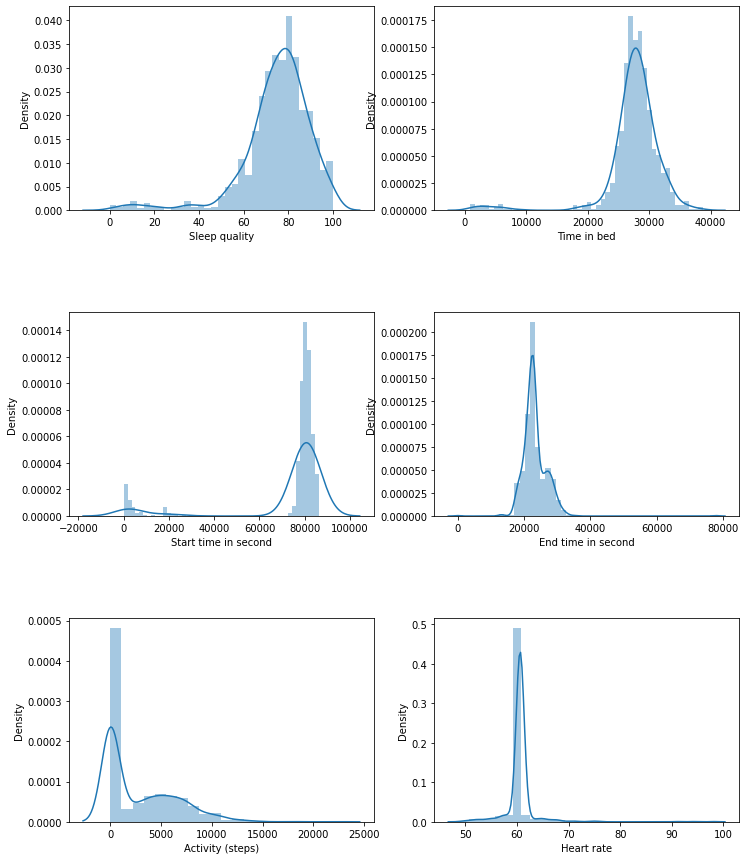

In [130]:
fig,axes = plt.subplots(3,2,figsize=(12,15))
for index,col in enumerate(num_col):
    x,y = index//2,index%2
    sns.distplot(df2[col],ax=axes[x,y])

plt.subplots_adjust(hspace=0.5)

### 3.2. Outliers detection

In [131]:
def outlier(df, column):
    # first quantile/percentile
    first_qrt = np.quantile(df[column],0.25)
    # third quantile/percentile
    third_qrt = np.quantile(df[column],0.75)
    lower_whisker = first_qrt - (third_qrt -first_qrt )*1.5
    upper_whisker = third_qrt + (third_qrt -first_qrt )*1.5
    df_outliers = df.loc[(df[column] < lower_whisker) | (df[column] > upper_whisker) ] 
    print(column,':',len(df_outliers))

In [132]:
# The mount of outliers
for col in num_col:
    outlier(df2,col)

Sleep quality : 37
Time in bed : 50
Start time in second : 96
End time in second : 41
Activity (steps) : 5
Heart rate : 162


In [133]:
def outlier_vis(df, column):
    plt.figure(figsize=(8,5))
    sns.boxplot(y= column,data=df)

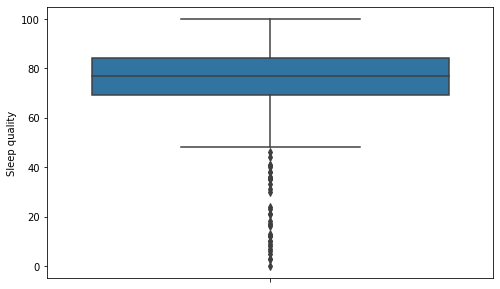

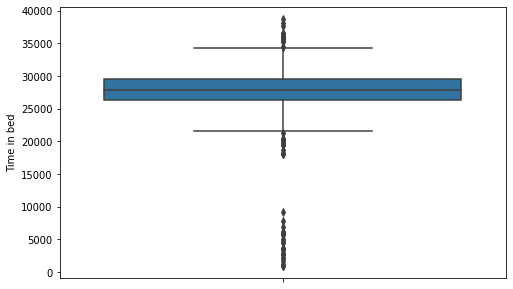

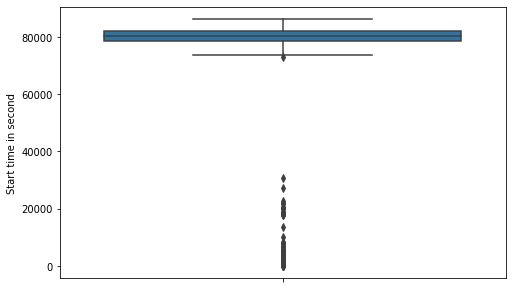

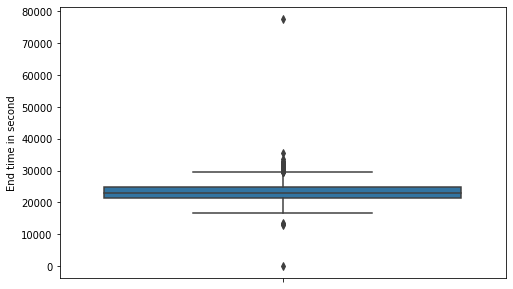

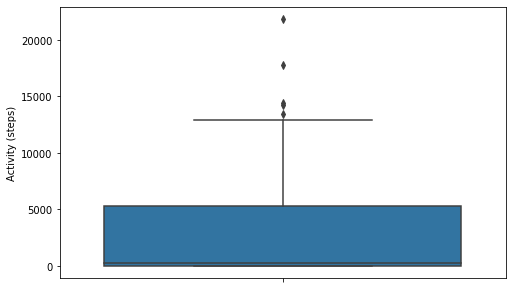

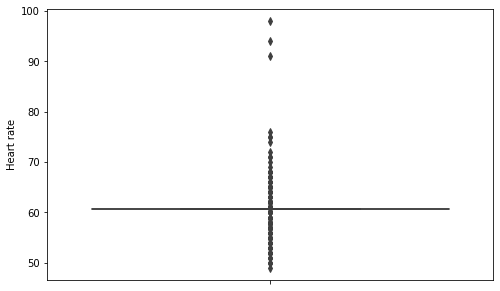

In [134]:
for col in num_col:
    outlier_vis(df2,col)

#### The percent of outliers is usually less than 10%. So "Start time in second" and "Heart rate" need process outlier

In [135]:
import scipy.stats

In [136]:
df2['Heart rate'] = scipy.stats.mstats.winsorize(df2['Heart rate'],limits = [0,0.15])

<ipython-input-136-b2491e14e83c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Heart rate'] = scipy.stats.mstats.winsorize(df2['Heart rate'],limits = [0,0.15])


In [137]:
df3 = df2.copy()

In [138]:
# The mount of outliers
for col in num_col:
    outlier(df3,col)

Sleep quality : 37
Time in bed : 50
Start time in second : 96
End time in second : 41
Activity (steps) : 5
Heart rate : 92


In [140]:
df3

,Sleep quality,Wake up,Time in bed,Start time in second,End time in second,Activity (steps),Heart rate
0,100,Good,30744.0,82669,27013,0,59.000000
1,3,Average,964.0,76670,77634,0,60.604938
2,98,Average,30642.0,81769,26011,0,57.000000
3,65,No,27120.0,81061,21781,0,60.604938
4,72,Good,24265.0,79930,17795,0,60.604938
...,...,...,...,...,...,...,...
882,91,No,32881.0,78854,25335,56,60.604938
883,81,No,25894.0,85759,25253,64,60.604938
884,71,No,32207.0,77045,22852,3316,60.604938
885,80,No,33239.0,77792,24631,6555,60.604938


### 3.3. Encoding categorical features

In [142]:
onehot_dt = pd.get_dummies(df3,drop_first = False)
onehot_dt

,Sleep quality,Time in bed,Start time in second,End time in second,Activity (steps),Heart rate,Wake up_Average,Wake up_Bad,Wake up_Good,Wake up_No
0,100,30744.0,82669,27013,0,59.000000,0,0,1,0
1,3,964.0,76670,77634,0,60.604938,1,0,0,0
2,98,30642.0,81769,26011,0,57.000000,1,0,0,0
3,65,27120.0,81061,21781,0,60.604938,0,0,0,1
4,72,24265.0,79930,17795,0,60.604938,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
882,91,32881.0,78854,25335,56,60.604938,0,0,0,1
883,81,25894.0,85759,25253,64,60.604938,0,0,0,1
884,71,32207.0,77045,22852,3316,60.604938,0,0,0,1
885,80,33239.0,77792,24631,6555,60.604938,0,0,0,1


### 3.4. Features Selection

In [143]:
corrMatrix = df3.corr()
corrMatrix

,Sleep quality,Time in bed,Start time in second,End time in second,Activity (steps),Heart rate
Sleep quality,1.000000,0.695206,0.234936,0.076523,-0.190491,-0.070854
Time in bed,0.695206,1.000000,0.398909,0.097175,-0.013831,0.000200
Start time in second,0.234936,0.398909,1.000000,-0.344245,-0.038875,-0.007081
End time in second,0.076523,0.097175,-0.344245,1.000000,0.076142,0.084744
Activity (steps),-0.190491,-0.013831,-0.038875,0.076142,1.000000,0.221350
Heart rate,-0.070854,0.000200,-0.007081,0.084744,0.221350,1.000000


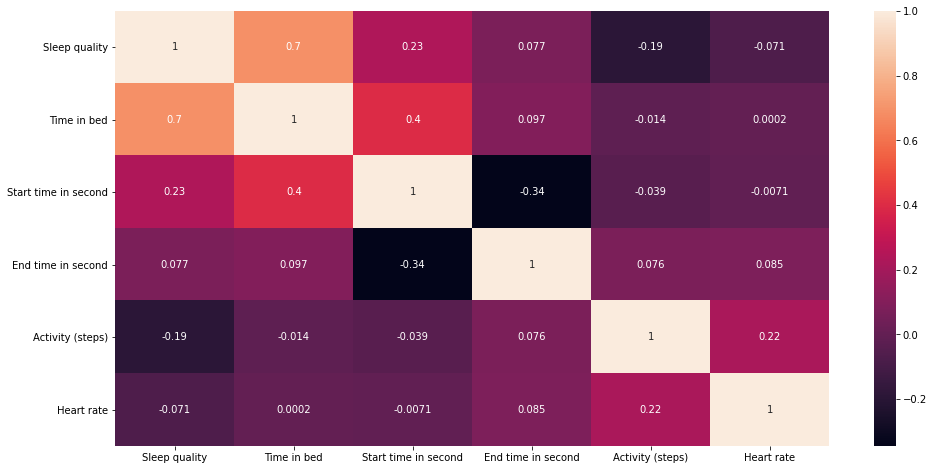

In [144]:
plt.figure(figsize=(16, 8))
sns.heatmap(corrMatrix, annot = True)
plt.show()

In [145]:
# Identify target variable
target = onehot_dt['Sleep quality']
variables = onehot_dt.drop(columns = 'Sleep quality')

In [146]:
# Identify P-values of variable
import statsmodels.api as sm
mod = sm.OLS(target,variables)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
p_values

Time in bed             8.275699e-117
Start time in second     8.492847e-02
End time in second       5.857356e-01
Activity (steps)         3.392607e-09
Heart rate               4.753269e-01
Wake up_Average          1.684728e-01
Wake up_Bad              5.348629e-02
Wake up_Good             1.068007e-01
Wake up_No               1.437275e-01
Name: P>|t|, dtype: float64

In [147]:
mod = sm.OLS(target,variables)
fii = mod.fit()
fii.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Time in bed,0.002372,0.000088,26.912141,8.275699e-117,0.002199,0.002545
Start time in second,-0.000032,0.000019,-1.724728,8.492847e-02,-0.000069,0.000004
End time in second,0.000060,0.000109,0.545227,5.857356e-01,-0.000155,0.000275
Activity (steps),-0.000711,0.000119,-5.972414,3.392607e-09,-0.000944,-0.000477
Heart rate,-0.180066,0.252142,-0.714146,4.753269e-01,-0.674938,0.314806
Wake up_Average,21.393746,15.522238,1.378264,1.684728e-01,-9.071278,51.858769
Wake up_Bad,36.424609,18.837939,1.933577,5.348629e-02,-0.548041,73.397259
Wake up_Good,24.613659,15.246352,1.614397,1.068007e-01,-5.309892,54.537210
Wake up_No,22.962155,15.691419,1.463358,1.437275e-01,-7.834914,53.759225


# 4. Machine Learning

### 4.1. Train and test split

In [151]:
# split data into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(onehot_dt.drop(columns ='Sleep quality'), onehot_dt['Sleep quality'], test_size=0.1, random_state=42)

In [152]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### 4.2. Logistic Regression

In [153]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

print('test accuracy:', logmodel.score(X_test,y_test))

test accuracy: 0.07865168539325842


### 4.3. Linear Regression

In [154]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
lm.score(X_test,y_test)

print('test accuracy:', lm.score(X_test,y_test))

test accuracy: 0.6585501238609782


### 4.4. Decision Tree

In [155]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

print('test accuracy:', dtree.score(X_test,y_test))

test accuracy: 0.0898876404494382


### 4.5. Random Tree

In [156]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=20)
rfc.fit(X_train,y_train)
print('test accuracy:', rfc.score(X_test,y_test))

test accuracy: 0.06741573033707865
